# Simple Linear Regression Basic Approach


First, we get a test data points with a slope of approximately 1. We will use random numbers from standard distribution.

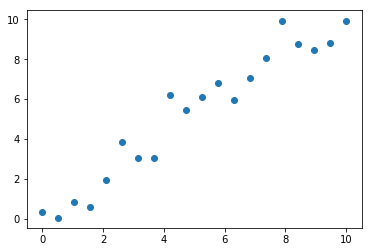

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Create 20 points from interval 0 to 10
x = np.linspace(0,10,20)
y = [value+np.random.normal(0,1) for value in x]

plt.scatter(x,y);

So from math we know that equation of line is y = mx + b.  We will now try to get the **m**  value but we will be estimating the value of the **m** and **b** and then **minimize** the error and adjust the **m** value. Here is a picture of what we will do:

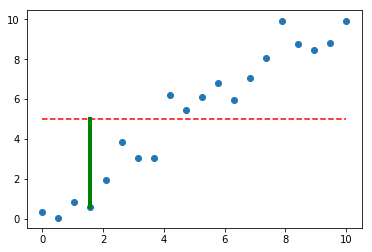

In [57]:
plt.scatter(x,y)
estimate_m = 0
estimate_b = 0
estimate_points = [5]*20
plt.plot(x,estimate_points,'--r')
plt.plot([x[3],x[3]],[estimate_points[3],y[3]],'g',lw=4);

The green above represents the error.  We will now define a function that finds a error given list of x and y coordinates.

In [6]:
def get_error(orig_y, estimate_y):
    error = 0
    for orgi,estimate in zip(orig_y,estimate_y):
        error +=(orgi-estimate)**2
    return error
get_error(y,estimate_points)

186.3060065292004

So now, we need to tune our **m** so that our estimation is **minimized**

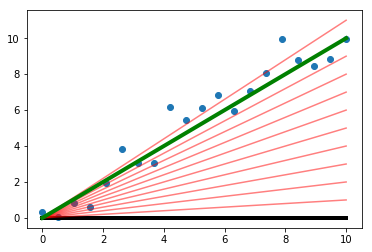

In [59]:
#Lets set previous error to infinity as initial value.
previous_error = 10000
estimate_m = 0
estimate_b = 0
current_error = get_error(estimate_points,y)
plt.scatter(x,y)
estimate_points = [estimate_m*val + estimate_b for val in x]
plt.plot(x,estimate_points,'k',lw=4)
while current_error <= previous_error:
    previous_error = current_error
    estimate_m += 0.1
    estimate_points = [estimate_m*val + estimate_b for val in x]
    current_error = get_error(estimate_points,y)
    plt.plot(x,estimate_points,'r',alpha=0.5)

estimate_m -= 0.1   
estimate_points = [estimate_m*val + estimate_b for val in x]
plt.plot(x,estimate_points,'g',lw=4);
    
    

You can see from above that the slope changes as it tries to minimize the error.  Thus our final regression line would be the green line.  Note that we did not account to split the data for test/train and have validation set as well.  As this is my first attempt, I won't dive deep into those techniques yet.  Ultimately my goal for linear regression will be to write multiple linear regression functions from scratch and use it for a large data set.